In [1]:
from tensorflow.keras.datasets import imdb
from sklearn.model_selection import train_test_split

# 가장 자주 등장하는 단어 500개만 사용
(train_input, train_target), (test_input, test_target) = imdb.load_data(
    num_words=500)

# 검증세트
train_input, val_input, train_target, val_target = train_test_split(
    train_input, train_target, test_size=0.2, random_state=42)

In [2]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

train_seq = pad_sequences(train_input, maxlen=100)
val_seq = pad_sequences(val_input, maxlen=100)

In [3]:
from tensorflow import keras

model = keras.Sequential()
model.add(keras.layers.Embedding(500, 16, input_length=100))
model.add(keras.layers.LSTM(8))
model.add(keras.layers.Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 100, 16)           8000      
_________________________________________________________________
lstm (LSTM)                  (None, 8)                 800       
_________________________________________________________________
dense (Dense)                (None, 1)                 9         
Total params: 8,809
Trainable params: 8,809
Non-trainable params: 0
_________________________________________________________________


In [4]:
# 모델 설정과 훈련
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
model.compile(optimizer=rmsprop, loss='binary_crossentropy', metrics=['acc'])

checkpoint_cb = keras.callbacks.ModelCheckpoint('best-lstm-model.h5')

early_stopping_cb = keras.callbacks.EarlyStopping(patience=3,
                                                  restore_best_weights=True)
history = model.fit(train_seq, train_target, epochs=100, batch_size=64,
                    validation_data=(val_seq, val_target),
                    callbacks=[checkpoint_cb, early_stopping_cb])

Train on 20000 samples, validate on 5000 samples
Epoch 1/100
20000/20000 [==============================] - 11s 537us/sample - loss: 0.6925 - acc: 0.5333 - val_loss: 0.6916 - val_acc: 0.5776
Epoch 2/100
20000/20000 [==============================] - 8s 424us/sample - loss: 0.6899 - acc: 0.6119 - val_loss: 0.6881 - val_acc: 0.6320
Epoch 3/100
20000/20000 [==============================] - 8s 419us/sample - loss: 0.6822 - acc: 0.6541 - val_loss: 0.6745 - val_acc: 0.6534
Epoch 4/100
20000/20000 [==============================] - 8s 415us/sample - loss: 0.6425 - acc: 0.6951 - val_loss: 0.6177 - val_acc: 0.7236
Epoch 5/100
20000/20000 [==============================] - 9s 426us/sample - loss: 0.5974 - acc: 0.7387 - val_loss: 0.5912 - val_acc: 0.7364
Epoch 6/100
20000/20000 [==============================] - 8s 415us/sample - loss: 0.5741 - acc: 0.7523 - val_loss: 0.5709 - val_acc: 0.7506
Epoch 7/100
20000/20000 [==============================] - 9s 426us/sample - loss: 0.5533 - acc: 0.7637 

##### 성능 높이기
- dropout : 파라미터 존재
- sigmoid => tanh

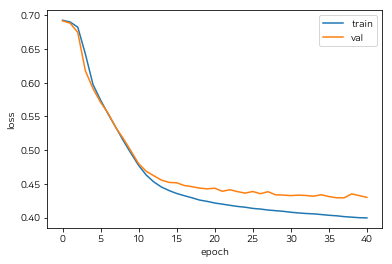

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline

# 훈련 손실과 검증 손실 시각화
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

In [8]:
model2 = keras.Sequential()
model2.add(keras.layers.Embedding(500, 16, input_length=100))
model2.add(keras.layers.LSTM(8, dropout=0.3))
model2.add(keras.layers.Dense(1, activation='sigmoid'))

In [9]:
# 모델 설정과 훈련
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
model2.compile(optimizer=rmsprop, loss='binary_crossentropy', metrics=['acc'])

checkpoint_cb = keras.callbacks.ModelCheckpoint('best-lstm-model2.h5')

early_stopping_cb = keras.callbacks.EarlyStopping(patience=3,
                                                  restore_best_weights=True)
history = model2.fit(train_seq, train_target, epochs=100, batch_size=64,
                     validation_data=(val_seq, val_target),
                     callbacks=[checkpoint_cb, early_stopping_cb])

Train on 20000 samples, validate on 5000 samples
Epoch 1/100
20000/20000 [==============================] - 11s 573us/sample - loss: 0.6928 - acc: 0.5327 - val_loss: 0.6922 - val_acc: 0.5960
Epoch 2/100
20000/20000 [==============================] - 9s 451us/sample - loss: 0.6911 - acc: 0.6043 - val_loss: 0.6899 - val_acc: 0.6300
Epoch 3/100
20000/20000 [==============================] - 9s 443us/sample - loss: 0.6851 - acc: 0.6594 - val_loss: 0.6762 - val_acc: 0.6916
Epoch 4/100
20000/20000 [==============================] - 10s 476us/sample - loss: 0.6502 - acc: 0.7013 - val_loss: 0.6315 - val_acc: 0.6978
Epoch 5/100
20000/20000 [==============================] - 9s 445us/sample - loss: 0.6219 - acc: 0.7027 - val_loss: 0.6122 - val_acc: 0.7242
Epoch 6/100
20000/20000 [==============================] - 9s 448us/sample - loss: 0.6036 - acc: 0.7214 - val_loss: 0.5942 - val_acc: 0.7336
Epoch 7/100
20000/20000 [==============================] - 9s 456us/sample - loss: 0.5839 - acc: 0.7362

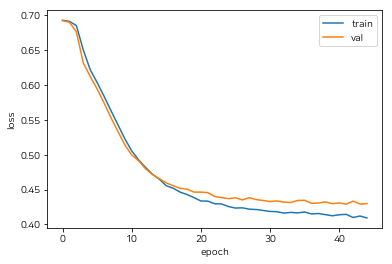

In [10]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

In [11]:
model3 = keras.Sequential()
model3.add(keras.layers.Embedding(500, 16, input_length=100))
model3.add(keras.layers.LSTM(8, dropout=0.3, return_sequences=True))
model3.add(keras.layers.LSTM(8, dropout=0.3))
model3.add(keras.layers.Dense(1, activation='sigmoid'))

In [13]:
model3.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 100, 16)           8000      
_________________________________________________________________
lstm_2 (LSTM)                (None, 100, 8)            800       
_________________________________________________________________
lstm_3 (LSTM)                (None, 8)                 544       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 9         
Total params: 9,353
Trainable params: 9,353
Non-trainable params: 0
_________________________________________________________________


In [14]:
# 모델 설정과 훈련
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
model3.compile(optimizer=rmsprop, loss='binary_crossentropy', metrics=['acc'])

checkpoint_cb = keras.callbacks.ModelCheckpoint('best-lstm-model3.h5')

early_stopping_cb = keras.callbacks.EarlyStopping(patience=3,
                                                  restore_best_weights=True)
history = model3.fit(train_seq, train_target, epochs=100, batch_size=64,
                     validation_data=(val_seq, val_target),
                     callbacks=[checkpoint_cb, early_stopping_cb])

Train on 20000 samples, validate on 5000 samples
Epoch 1/100
20000/20000 [==============================] - 21s 1ms/sample - loss: 0.6928 - acc: 0.5264 - val_loss: 0.6925 - val_acc: 0.5476
Epoch 2/100
20000/20000 [==============================] - 16s 820us/sample - loss: 0.6915 - acc: 0.5753 - val_loss: 0.6899 - val_acc: 0.6334
Epoch 3/100
20000/20000 [==============================] - 17s 865us/sample - loss: 0.6839 - acc: 0.6432 - val_loss: 0.6729 - val_acc: 0.6716
Epoch 4/100
20000/20000 [==============================] - 16s 810us/sample - loss: 0.6303 - acc: 0.6840 - val_loss: 0.5827 - val_acc: 0.7192
Epoch 5/100
20000/20000 [==============================] - 16s 824us/sample - loss: 0.5644 - acc: 0.7243 - val_loss: 0.5424 - val_acc: 0.7426
Epoch 6/100
20000/20000 [==============================] - 17s 838us/sample - loss: 0.5350 - acc: 0.7444 - val_loss: 0.5156 - val_acc: 0.7556
Epoch 7/100
20000/20000 [==============================] - 17s 852us/sample - loss: 0.5150 - acc: 0.7

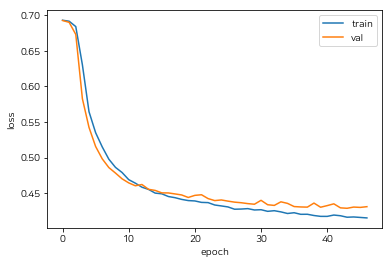

In [15]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()